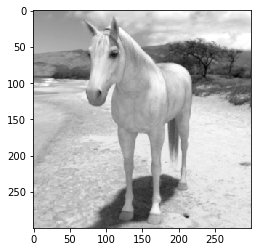

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "E:/Projects/Programming/AI/Tensorflow/datasets"
DATASET = "horseorhuman"
CATEGORIES = ["Horse", "Human"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, DATASET, "train", category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

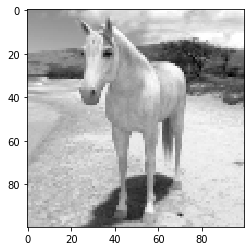

In [2]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [3]:
training_data = []
test_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, DATASET, "train", category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
    
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, DATASET, "test", category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_array, class_num])
    
create_training_data()
create_test_data()

In [4]:
print(len(training_data), len(test_data))

1027 256


In [5]:
import random

random.shuffle(training_data)
random.shuffle(test_data)

In [6]:
for sample in test_data[:10]:
    print(sample[1])

0
1
1
0
1
0
1
0
1
1


In [7]:
train_x = []
train_y = []

test_x = []
test_y = []

In [8]:
for features, label in training_data:
    train_x.append(features)
    train_y.append(label)

for features, label in test_data:
    test_x.append(features)
    test_y.append(label)
    
train_x = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_x = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
np.save(os.path.join(DATADIR, DATASET, "train", "horseorhuman_train_x.npy"), train_x)
np.save(os.path.join(DATADIR, DATASET, "train", "horseorhuman_train_y.npy"), train_y)
np.save(os.path.join(DATADIR, DATASET, "test", "horseorhuman_test_x.npy"), test_x)
np.save(os.path.join(DATADIR, DATASET, "test", "horseorhuman_test_y.npy"), test_y)

In [10]:
z1 = np.load(os.path.join(DATADIR, DATASET, "train", "horseorhuman_train_x.npy"))
z2 = np.load(os.path.join(DATADIR, DATASET, "test", "horseorhuman_test_x.npy"))

In [11]:
print(len(z1))
print(len(z2)

1027